In [18]:
import pandas as pd


# get specific column and row by  index:
###################
df[[col_index]] # column
df.iloc[index] # row
# get specific col of a row by its value:
df.iloc[index]._colname_  #{example: df.iloc[index].price}
# get row from df with a specific value of column
out = df.loc[df['column_name'] == col_value]



## df drop or retain columns by name:
####################################
cols_to_drop = [ 'UserID, 'YOB', 'votes', 'Happy']
cat_df = df.drop( cols_to_drop, axis = 1 ]
cols_to_retain = [ 'a', 'list', 'of', 'categorical', 'column', 'names' ]
cat_df = df[ cols_to_retain ]
                 



## get unique element from a column
###############
df._col_name.unique()
#or
df['col_name'].unique()


### df to list and dict
#######################
df['col_name'].tolist()
df.to_dict()




## handle missing val:
####################
df.fillna('_missing_val_') 
# fill specific column:
df.col_name.fillna('')
# or 
df['col_name'].fillna('')
# replace some missing data with PD NaN, NOTE: PD DF default NaNs are not np.nan or math.nan. Just missing vals
# default NaNs are actually nulls to handle them:
df.replace('-unknown-', np.nan, inplace=True)
# count total % of missing value in DF after loading from file
out_nan = (df.isnull().sum() / df.shape[0]) * 100
out_nan[out_nan > 0]#.drop('country_destination')




# concat two dfs by row
###############
# axis = 0 implies in same row, append as list
# axis = 1 implies as a differnt column or entry differnt row. Like cascading.
out = pd.concat((data_1, data_2), axis=0, ignore_index=True)
out = pd.concat((data_1, data_2), axis=1, ignore_index=True)




# Get stats (mean, median, percentiles) of a column
######################
df['col_name'].describe()
df['col_name'].dropna().describe() # if col has nan values




## date time data:
###################
# convert string to PD datetime format:
df['some_data_column'] = pd.to_datetime(df['some_data_column'])
# greater than some date
df_2013 = df[df['some_data_column'] > pd.to_datetime(20130101, format='%Y%m%d')]
# this will return entire df which has condition on these columns. Acts like filter. We can keep on adding filter to this one.
# get day of the date:
weekdays = []
for date in df.some_data_column:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)






## convert a categorical column/field to one-hot-vector using pd.get_dummies():
#################
out = pd.get_dummies(gender, dummy_na = True)
# this will create a df of dim: rows x num_categ, each with one-hot vector
# dummy_na retails NaN or missing ones. Represented by np.nan if want to obtain the col by key, default is False
out['MALE'] will retain the col or DF corresponding to the one hot vector of Male gender.

# If we know the categorical features by names
def one_hot_encoding_categorical_features(data, categorical_features):
    for feature in categorical_features:
            data_dummy = pd.get_dummies(data[feature], prefix=feature)
            data.drop([feature], axis=1, inplace=True)
            data = pd.concat((data, data_dummy), axis=1)

    return data
                 




## plot DF 
#############

df.col_name.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()


NameError: name 'col_index' is not defined

In [8]:
import numpy as np
import math

val = np.nan

np.isnan(val)
math.isnan(val)
pd.np.nan

a = [1,4,6]
b = [1,2,3]
print np.corrcoef(a,b)


# Fill all nan values with real numbers:
# it converts nans tp 0 and infnans to huge numbers:
X = np.nan_to_num(X)


[[ 1.          0.99339927]
 [ 0.99339927  1.        ]]


In [3]:
import sklearn as sk
from sklearn import preprocessing

# cross validation
##################
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test,W_train,W_test = train_test_split(X,Y,weights,test_size=0.20, random_state=42)




# precision, recall, Fscore, accuracy
#######################################
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

(p,r,f,support)=precision_recall_fscore_support(Y_test, predicted, beta=1.0, labels=None,
	                                pos_label=1, average=None,
	                                warn_for=('precision', 'recall',
	                                          'f-score'),
	                                sample_weight=None)

accuracy = accuracy_score(Y_test, predicted)




## basic models
################
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier


## Tf-Idf
############

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["This is very strange",
          "This is very nice"]
test_corpus = ["This is very strange",
          "This is very nice"]
vectorizer = TfidfVectorizer(min_df=1)

# fits and transform. FIrst time use fits and transform
X = vectorizer.fit_transform(corpus)

# fits and transform
X_test = vectorizer.fit_transform(test_corpus)
# only transforms:
X_test = vectorizer.transform(test_corpus)


idf = vectorizer.idf_
print dict(zip(vectorizer.get_feature_names(), idf))

#tfidf feature matrix:
feat = X_test.todense()




## Count vectorizer
#####################
from sklearn.feature_extraction.text import CountVectorizer

texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)
print(cv.get_feature_names())
print(cv_fit.toarray())


# DictVectorizer



## Feature Selection
#####################
# http://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = iris.data, iris.target
X.shape
#(150, 4)
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
#array([ 0.04...,  0.05...,  0.4...,  0.4...])
model = SelectFromModel(clf, prefit=True) # this can take any SKLearn model: L1, SGD etc.
X_new = model.transform(X)
X_new.shape               
#(150, 2)




## Sklearn labelEncoder assigns the numerical or categorical labels to some int id
# very useful for categorical labels 
#####################
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer() # makes multiclass to binary labels

le.fit([1, 2, 2, 6])
# or encoded_Y_train = le.fit_transform(Y_train)
print le.classes_
#array([1, 2, 6])
print le.fit_transform([1, 1, 2, 6]) 
#array([0, 0, 1, 2]...)
print le.inverse_transform([0, 0, 1, 2])
#array([1, 1, 2, 6])

lb.fit([1, 2, 2, 6])
# or encoded_Y_train = le.fit_transform(Y_train)
print lb.classes_
#array([1, 2, 6])
print lb.transform([1, 2, 2, 6])
# array([[1, 0, 0],
#       [0, 1, 0],
 #      [0, 1, 0],
#     [0, 0, 1]])



def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    out = np.sum(np.where(a != 0, a * np.log(a / b), 0))
    if out == np.inf:
        return None
    return out


def jsd(x,y): #Jensen-shannon divergence
    
    warnings.filterwarnings("ignore", category = RuntimeWarning)
    x = np.array(x)
    y = np.array(y)
    d1 = x*np.log2(2*x/(x+y))
    d2 = y*np.log2(2*y/(x+y))
    d1[np.isnan(d1)] = 0
    d2[np.isnan(d2)] = 0
    d = 0.5*np.sum(d1+d2)    
    return d

In [9]:
import scipy
from scipy.stats.stats import pearsonr   

# Correlation
a = [1,4,6]
b = [1,2,3]   
print pearsonr(a,b)
# returns Pearson’s correlation coefficient, 2-tailed p-value

(0.99339926779878274, 0.073186395040328034)


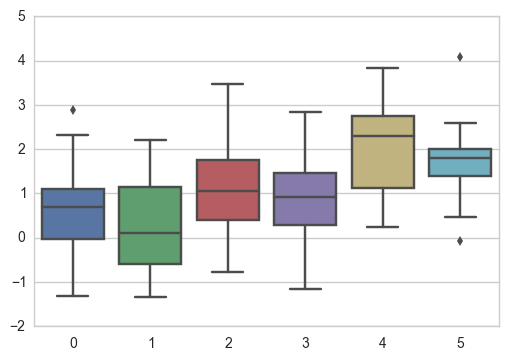

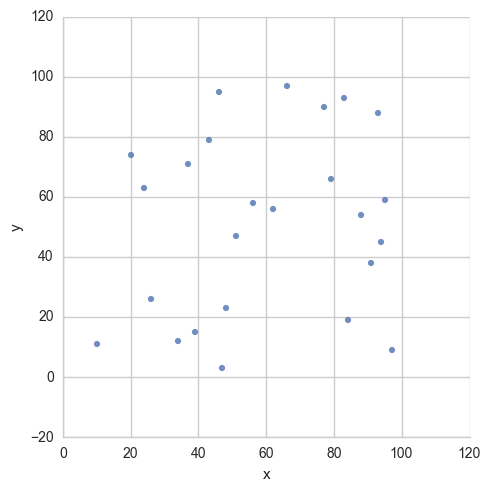

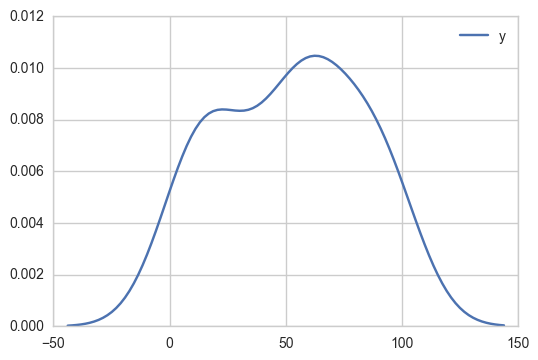

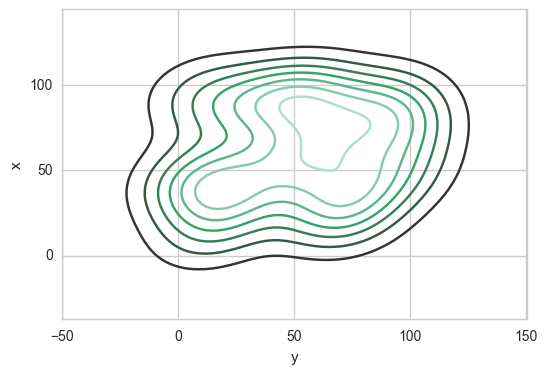

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

%matplotlib inline

sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
plt.figure()
# or plt.clf() if want to clear this plot and move to next
# plt.figure() retains the older one and creates new one for later ones.

## With pandas
df = pd.DataFrame()
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)
sns.lmplot('x', 'y', data=df, fit_reg=False)
plt.figure()

# density plot
sns.kdeplot(df.y)
plt.figure()

sns.kdeplot(df.y, df.x)

# more graphs at:
# http://chrisalbon.com/python/pandas_with_seaborn.html

